In [1]:
import pandas as pd
import urllib.request

data = pd.read_csv('../../twitter/tweetdata/2018_down2_tweet.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../twitter/tweetdata/2018_down2_tweet(e).csv', error_bad_lines=False))


In [2]:
text = data[['text']].astype(str)
text['text'] = text.apply(lambda row: row['text'].replace("/"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("-"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("—"," "), axis=1)
#text['main article'] = text.apply(lambda row: row['main article'].replace("",""), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("*"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("…"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("\\"," "), axis=1)



In [3]:
import nltk
text['text'] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [4]:
text['text']

0     [In, today, 's, blood, bath, ,, we, must, reme...
1     [Untrue, in, the, extreme, ., Privacy, coins, ...
2     [If, the, worst, comes, and, I, lose, my, Bitc...
3     [If, the, worst, comes, and, I, lose, my, Bitc...
4                                                [:, )]
                            ...                        
73    [Developing, nations, are, employing, blockcha...
74    [Enterprises, get, it, ., @, EY_US, puts, zero...
75    [Market, cap, does, n't, reflect, activity, .,...
76    [The, @, AlethioEthstats, team, created, a, pr...
77    [``, Ethereum, feels, like, the, easiest, one,...
Name: text, Length: 711, dtype: object

In [5]:
# 소문자 적용 , - 문자 삭제
text['text'] = text['text'].apply(lambda x : [word.lower().replace("-","") for word in x])
# 공백문자 삭제
text['text'] = text['text'].apply(lambda x : [word for word in x if word])

In [6]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['text']), axis=1)

In [7]:
text['pos tag']

0     [(in, IN), (today, NN), ('s, POS), (blood, NN)...
1     [(untrue, NN), (in, IN), (the, DT), (extreme, ...
2     [(if, IN), (the, DT), (worst, JJS), (comes, VB...
3     [(if, IN), (the, DT), (worst, JJS), (comes, VB...
4                                      [(:, :), (), ))]
                            ...                        
73    [(developing, VBG), (nations, NNS), (are, VBP)...
74    [(enterprises, NNS), (get, VBP), (it, PRP), (....
75    [(market, NN), (cap, NN), (does, VBZ), (n't, R...
76    [(the, DT), (@, NN), (alethioethstats, VBZ), (...
77    [(``, ``), (ethereum, NN), (feels, NNS), (like...
Name: pos tag, Length: 711, dtype: object

In [8]:
# 불용어 품사 제거
text['text'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

In [9]:
text['text']

0     [today, 's, blood, bath, ,, remember, nothing,...
1     [untrue, extreme, ., privacy, coins, be, numbe...
2     [worst, comes, i, lose, bitcoin, bet, (, keep,...
3     [worst, comes, i, lose, bitcoin, bet, (, keep,...
4                                                [:, )]
                            ...                        
73    [developing, nations, are, employing, blockcha...
74    [enterprises, get, ., @, ey_us, puts, knowledg...
75    [market, cap, does, reflect, activity, ., dece...
76    [@, alethioethstats, created, astonishing, ani...
77    [``, ethereum, feels, easiest, make, bull, cas...
Name: text, Length: 711, dtype: object

In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: [word for word in x if word not in (stop)])

In [11]:
import csv
stopword_list =[]
f = open('../../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['text'] = text['text'].apply(lambda x: [word for word in x if word not in stopword_list])

In [12]:
import re
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['text'] = text['text'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


In [13]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

In [14]:
native_number_pattern=re.compile(r'[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

In [15]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['text'] = text['text'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

In [16]:
from nltk.stem import WordNetLemmatizer
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사
#print(text)

In [17]:
tokenized_doc = text['text'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [18]:
article_contents = tokenized_doc.values.tolist()

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [20]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [21]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [22]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [23]:
word2id = defaultdict(lambda: 0)

In [24]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [25]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [26]:
len(tf_idf_result)

2515

In [27]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

2515


In [28]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [29]:
import gensim
NUM_TOPICS = 4 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50) 
# passes is similar with epoch , iterarion : loop per document
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.002*"prestonjbyrne" + 0.002*"lora" + 0.002*"underpin" + 0.002*"traffic" + 0.002*"tokenised" + 0.002*"tonevays" + 0.002*"rural" + 0.002*"fulfil"')
(1, '0.002*"timespan=all" + 0.002*"beckyquick" + 0.002*"facebook" + 0.002*"cybernetic" + 0.002*"maker" + 0.002*"cburniske" + 0.002*"joesquawk" + 0.002*"grade"')
(2, '0.002*"xrpledger" + 0.002*"query" + 0.002*"functionality" + 0.002*"custom" + 0.002*"fascinate" + 0.002*"fibre" + 0.002*"dabble" + 0.002*"schelling"')
(3, '0.003*"diversity" + 0.003*"regardless" + 0.003*"august" + 0.003*"weak" + 0.003*"disclose" + 0.003*"hodlers" + 0.003*"faithful" + 0.003*"adam"')


In [30]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [31]:
sentences = article_contents

In [32]:
from gensim.models import Word2Vec

In [33]:
model = Word2Vec(sentences, min_count=1)

In [34]:
len(model.wv.vocab)

2515

In [35]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [36]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [37]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [38]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [39]:
temp_cluster_result['cluster'] = assigned_clusters

In [40]:
temp_cluster_result['raw_data'] = X.tolist()

In [41]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [42]:
from sklearn.metrics import pairwise_distances

In [43]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [44]:
len(cosine_centroid_list)

2515

In [45]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [46]:
sum(temp_distance[3])

1564.610242398843

In [47]:
import scipy.spatial.distance as dist

In [48]:
dist.cosine(X[0],cosine_centroid_list[0])

0.06813627829299351

In [49]:
dist.euclidean(X[0],cosine_centroid_list[0])

0.06292670195407378

In [50]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [51]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [52]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 기술한계

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1516,"[-0.00026435163454152644, -0.00452959910035133...",upload,0,"[0.00028652788, -0.00018628949, 0.00082512206,...",0.629942,0.001216,1.628726,NaN
1063,"[-0.0010111189913004637, 0.003760129678994417,...",save,0,"[0.00028652788, -0.00018628949, 0.00082512206,...",0.638814,0.004865,1.633949,NaN
650,"[0.0005253053968772292, 0.002169074025005102, ...",produce,0,"[0.00028652788, -0.00018628949, 0.00082512206,...",0.644161,0.002433,1.641728,NaN
2248,"[0.002065865555778146, 0.004344926681369543, 0...",aridavidpaul,0,"[0.00028652788, -0.00018628949, 0.00082512206,...",0.646640,0.001216,1.645424,NaN
169,"[-0.002421111101284623, -0.0029162054415792227...",harm,0,"[0.00028652788, -0.00018628949, 0.00082512206,...",0.655924,0.001216,1.654708,NaN
1602,"[0.0022617741487920284, -0.002069075359031558,...",blockshowasia,0,"[0.00028652788, -0.00018628949, 0.00082512206,...",0.667351,0.007298,1.660053,NaN
2343,"[0.0020241972524672747, 0.001611395156942308, ...",ethereums,0,"[0.00028652788, -0.00018628949, 0.00082512206,...",0.665298,0.002433,1.662865,NaN
340,"[-0.0013702043797820807, 0.0013676194939762354...",thankyoupatrons,0,"[0.00028652788, -0.00018628949, 0.00082512206,...",0.672450,0.002433,1.670017,NaN
906,"[0.0007444210932590067, -0.0032783071510493755...",offend,0,"[0.00028652788, -0.00018628949, 0.00082512206,...",0.673503,0.001216,1.672287,NaN
509,"[-0.0006765174912288785, -0.001360428403131663...",publish,0,"[0.00028652788, -0.00018628949, 0.00082512206,...",0.685125,0.006081,1.679044,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1250,"[-0.005122463684529066, 0.002282498637214303, ...",metric,1,"[-0.0009457014, -0.00014735453, 1.1448388e-05,...",0.507230,0.001216,1.506014,NaN
2141,"[-0.004717194940894842, 0.003404865739867091, ...",meaningful,1,"[-0.0009457014, -0.00014735453, 1.1448388e-05,...",0.582705,0.004865,1.577840,NaN
2323,"[-0.0018274090252816677, 0.0004955853219144046...",regardless,1,"[-0.0009457014, -0.00014735453, 1.1448388e-05,...",0.614616,0.001216,1.613399,NaN
2312,"[-0.0056383004412055016, 0.00466521643102169, ...",jerk,1,"[-0.0009457014, -0.00014735453, 1.1448388e-05,...",0.618214,0.001216,1.616997,NaN
368,"[-0.0040755304507911205, -0.001234697527252137...",easy,1,"[-0.0009457014, -0.00014735453, 1.1448388e-05,...",0.626101,0.003649,1.622452,NaN
2160,"[-0.0016459432663396, -0.0023616470862179995, ...",premise,1,"[-0.0009457014, -0.00014735453, 1.1448388e-05,...",0.653014,0.002433,1.650581,NaN
465,"[0.00372147373855114, 0.004625935573130846, -0...",implode,1,"[-0.0009457014, -0.00014735453, 1.1448388e-05,...",0.657608,0.001216,1.656392,NaN
1325,"[0.001811186783015728, -0.004162662196904421, ...",conscious,1,"[-0.0009457014, -0.00014735453, 1.1448388e-05,...",0.659074,0.001216,1.657858,NaN
1875,"[-0.0037203750107437372, 0.0013264508452266455...",fundstrat,1,"[-0.0009457014, -0.00014735453, 1.1448388e-05,...",0.666187,0.001216,1.664971,NaN
2218,"[-0.004652980715036392, 0.0017830266151577234,...",massive,1,"[-0.0009457014, -0.00014735453, 1.1448388e-05,...",0.667357,0.001216,1.666141,NaN


In [54]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(30)   # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
256,"[-0.0013949640560895205, 0.003997492603957653,...",order,2,"[0.00031393018, 0.000691676, 7.94992e-05, 0.00...",0.509262,0.004865,1.504397,NaN
736,"[-0.0011415734188631177, -0.001473188283853232...",hour,2,"[0.00031393018, 0.000691676, 7.94992e-05, 0.00...",0.517230,0.007298,1.509932,NaN
528,"[0.0026902626268565655, 0.0032595505472272635,...",dominate,2,"[0.00031393018, 0.000691676, 7.94992e-05, 0.00...",0.518905,0.002433,1.516473,NaN
666,"[0.0029103318229317665, 0.001439399435184896, ...",profile,2,"[0.00031393018, 0.000691676, 7.94992e-05, 0.00...",0.542657,0.003649,1.539008,NaN
1337,"[0.002935475669801235, 0.002634174656122923, 0...",economics,2,"[0.00031393018, 0.000691676, 7.94992e-05, 0.00...",0.571114,0.002433,1.568681,NaN
2086,"[0.00038625573506578803, 0.004261655267328024,...",inhibit,2,"[0.00031393018, 0.000691676, 7.94992e-05, 0.00...",0.577919,0.002433,1.575487,NaN
1190,"[0.0023419400677084923, 0.003727237693965435, ...",second,2,"[0.00031393018, 0.000691676, 7.94992e-05, 0.00...",0.581934,0.003649,1.578285,NaN
1433,"[-0.001628137775696814, 0.0029841165523976088,...",adjust,2,"[0.00031393018, 0.000691676, 7.94992e-05, 0.00...",0.598759,0.004865,1.593894,NaN
913,"[-0.004800428636372089, -0.0002535637468099594...",supply,2,"[0.00031393018, 0.000691676, 7.94992e-05, 0.00...",0.602374,0.006081,1.596293,NaN
785,"[-0.004690174944698811, 0.003809928661212325, ...",provide,2,"[0.00031393018, 0.000691676, 7.94992e-05, 0.00...",0.609292,0.004865,1.604427,NaN


In [55]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(30)  # 거래소 돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
7,"[-0.03473491594195366, -0.005665278527885675, ...",bitcoin,3,"[-0.002401559, -0.00033014306, 0.00027141112, ...",0.012010,0.895180,0.116831,NaN
27,"[-0.02184232883155346, -0.002755442401394248, ...",ethereum,3,"[-0.002401559, -0.00033014306, 0.00027141112, ...",0.025183,0.119195,0.905988,NaN
90,"[-0.021176885813474655, 0.003138682572171092, ...",http,3,"[-0.002401559, -0.00033014306, 0.00027141112, ...",0.047079,0.133790,0.913289,NaN
202,"[-0.019235149025917053, 0.003127230564132333, ...",time,3,"[-0.002401559, -0.00033014306, 0.00027141112, ...",0.044443,0.082707,0.961736,NaN
79,"[-0.014588898047804832, 0.0036753315944224596,...",price,3,"[-0.002401559, -0.00033014306, 0.00027141112, ...",0.047867,0.085139,0.962728,NaN
185,"[-0.01287166029214859, -0.0024923935998231173,...",crypto,3,"[-0.002401559, -0.00033014306, 0.00027141112, ...",0.052061,0.082707,0.969354,NaN
110,"[-0.01705949567258358, 0.00041039736242964864,...",money,3,"[-0.002401559, -0.00033014306, 0.00027141112, ...",0.048200,0.065679,0.982521,NaN
76,"[-0.009978119283914566, -0.00600605271756649, ...",people,3,"[-0.002401559, -0.00033014306, 0.00027141112, ...",0.066305,0.070544,0.995761,NaN
440,"[-0.01565576158463955, -0.0009902527090162039,...",market,3,"[-0.002401559, -0.00033014306, 0.00027141112, ...",0.061347,0.063246,0.998101,NaN
242,"[-0.0094294473528862, 0.0023602107539772987, 0...",make,3,"[-0.002401559, -0.00033014306, 0.00027141112, ...",0.066360,0.052300,1.014060,NaN


In [56]:
y_km = temp_cluster_result['cluster'].values

In [57]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

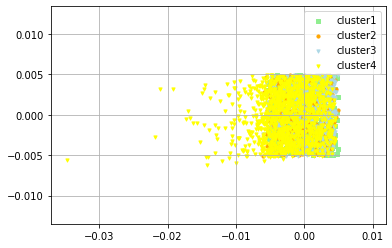

In [58]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [59]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 기술한계

399

In [60]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 인플

414

In [61]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 이슈

443

In [62]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 거래소

1259

In [63]:
temp_cluster_result['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 4 # 기술한계
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 6 # 인플
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 5  # 이슈
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 12 # 거래소

In [64]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [65]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [66]:
kmeans.inertia_

2.1422505932536735

In [67]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[3 0 0 ... 0 0 0]


In [68]:
cluster_values= list(model.wv.vocab)

In [69]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-2.1422505


In [70]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [71]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.028217766


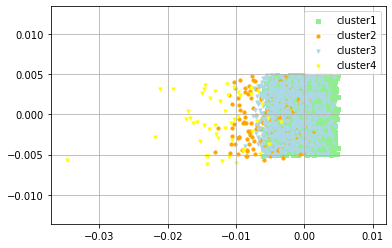

In [72]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [73]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [74]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [75]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [76]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [77]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [78]:
import scipy.spatial.distance as dist

In [79]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [80]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [81]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
314,"[0.0011444564443081617, 0.0007514895987696946,...",energy,0,"[-0.00023118407, 4.328666e-05, 0.00018913808, ...",0.026058,0.004865,1.021193,NaN
92,"[0.0016605426790192723, 0.0008229345548897982,...",please,0,"[-0.00023118407, 4.328666e-05, 0.00018913808, ...",0.025140,0.003649,1.021491,NaN
343,"[0.0016663422575220466, -0.001621501985937357,...",appreciate,0,"[-0.00023118407, 4.328666e-05, 0.00018913808, ...",0.027580,0.006081,1.021498,NaN
698,"[-0.0025997606571763754, 0.0031114332377910614...",ignore,0,"[-0.00023118407, 4.328666e-05, 0.00018913808, ...",0.025432,0.003649,1.021783,NaN
441,"[-0.0025787048507481813, -0.001956099877133965...",shut,0,"[-0.00023118407, 4.328666e-05, 0.00018913808, ...",0.025847,0.003649,1.022198,NaN
940,"[-0.004396428819745779, -0.002133537782356143,...",bring,0,"[-0.00023118407, 4.328666e-05, 0.00018913808, ...",0.028358,0.006081,1.022277,NaN
490,"[-0.0016794234979897738, -0.000561825232580304...",crisis,0,"[-0.00023118407, 4.328666e-05, 0.00018913808, ...",0.027409,0.004865,1.022544,NaN
2058,"[0.0011146409669891, -0.00015260875807143748, ...",bytefederal,0,"[-0.00023118407, 4.328666e-05, 0.00018913808, ...",0.025159,0.002433,1.022727,NaN
974,"[-0.0032440812792629004, 0.004806632176041603,...",brexit,0,"[-0.00023118407, 4.328666e-05, 0.00018913808, ...",0.028821,0.006081,1.022739,NaN
625,"[-0.0042222486808896065, 0.0025096682365983725...",decision,0,"[-0.00023118407, 4.328666e-05, 0.00018913808, ...",0.026580,0.003649,1.022931,NaN


In [82]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(30,'score') # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
524,"[-0.003750590607523918, -0.0003051572421099990...",short,1,"[-0.0052332133, -0.001004274, 0.0009069564, 0....",0.032271,0.045002,0.987268,NaN
125,"[-0.00855659693479538, -0.0010802671313285828,...",chart,1,"[-0.0052332133, -0.001004274, 0.0009069564, 0....",0.030941,0.030407,1.000534,NaN
86,"[-0.010240946896374226, -0.0011924095451831818...",cash,1,"[-0.0052332133, -0.001004274, 0.0009069564, 0....",0.033658,0.027974,1.005683,NaN
915,"[-0.006964806001633406, -0.0013988589635118842...",keiser,1,"[-0.0052332133, -0.001004274, 0.0009069564, 0....",0.032028,0.025542,1.006487,NaN
37,"[-0.007772523444145918, 0.002105156658217311, ...",keep,1,"[-0.0052332133, -0.001004274, 0.0009069564, 0....",0.029879,0.023109,1.006770,NaN
234,"[-0.0017324431100860238, 0.0004452134016901254...",global,1,"[-0.0052332133, -0.001004274, 0.0009069564, 0....",0.031484,0.024326,1.007158,NaN
665,"[-0.010160228237509727, 0.0033182629849761724,...",risk,1,"[-0.0052332133, -0.001004274, 0.0009069564, 0....",0.031557,0.024326,1.007231,NaN
178,"[-0.00955712515860796, -0.002852155826985836, ...",week,1,"[-0.0052332133, -0.001004274, 0.0009069564, 0....",0.032901,0.025542,1.007360,NaN
230,"[-0.007932517677545547, 0.0029351268894970417,...",believe,1,"[-0.0052332133, -0.001004274, 0.0009069564, 0....",0.032953,0.025542,1.007412,NaN
103,"[-0.010240721516311169, 0.004064443055540323, ...",world,1,"[-0.0052332133, -0.001004274, 0.0009069564, 0....",0.033015,0.025542,1.007474,NaN


In [83]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(40,'score')  # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
525,"[-0.007522972766309977, -0.0001720233703963458...",banker,2,"[-0.0017798035, -0.00014383622, 0.00020078591,...",0.031069,0.020677,1.010392,NaN
657,"[0.002337047830224037, -0.00010559821384958923...",outperform,2,"[-0.0017798035, -0.00014383622, 0.00020078591,...",0.035055,0.021893,1.013162,NaN
2270,"[-0.008645931258797646, -0.0038890556897968054...",photo,2,"[-0.0017798035, -0.00014383622, 0.00020078591,...",0.028471,0.013379,1.015092,NaN
411,"[-0.00034681634861044586, 0.003603737335652113...",true,2,"[-0.0017798035, -0.00014383622, 0.00020078591,...",0.027963,0.012163,1.015800,NaN
492,"[-0.006136300507932901, -0.0004518662753980607...",dollar,2,"[-0.0017798035, -0.00014383622, 0.00020078591,...",0.029534,0.013379,1.016155,NaN
399,"[-0.004437983501702547, -0.002289385534822941,...",explain,2,"[-0.0017798035, -0.00014383622, 0.00020078591,...",0.027706,0.010946,1.016760,NaN
956,"[0.0010254610097035766, 0.002386396983638406, ...",credit,2,"[-0.0017798035, -0.00014383622, 0.00020078591,...",0.027747,0.010946,1.016801,NaN
616,"[-0.005142855457961559, -0.0047914935275912285...",beat,2,"[-0.0017798035, -0.00014383622, 0.00020078591,...",0.030349,0.013379,1.016970,NaN
164,"[-0.0060460832901299, -0.0027106201741844416, ...",problem,2,"[-0.0017798035, -0.00014383622, 0.00020078591,...",0.026917,0.009730,1.017187,NaN
752,"[0.00023755314759910107, 0.0038471196312457323...",cover,2,"[-0.0017798035, -0.00014383622, 0.00020078591,...",0.025773,0.008514,1.017259,NaN


In [84]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 거래소 돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
7,"[-0.03473491594195366, -0.005665278527885675, ...",bitcoin,3,"[-0.012395898, -0.00077965937, 0.0023247434, 0...",0.130231,0.895180,0.235052,NaN
90,"[-0.021176885813474655, 0.003138682572171092, ...",http,3,"[-0.012395898, -0.00077965937, 0.0023247434, 0...",0.039590,0.133790,0.905800,NaN
18,"[-0.009682238101959229, 0.002751748776063323, ...",year,3,"[-0.012395898, -0.00077965937, 0.0023247434, 0...",0.034339,0.094870,0.939470,NaN
185,"[-0.01287166029214859, -0.0024923935998231173,...",crypto,3,"[-0.012395898, -0.00077965937, 0.0023247434, 0...",0.030657,0.082707,0.947951,NaN
79,"[-0.014588898047804832, 0.0036753315944224596,...",price,3,"[-0.012395898, -0.00077965937, 0.0023247434, 0...",0.037548,0.085139,0.952409,NaN
27,"[-0.02184232883155346, -0.002755442401394248, ...",ethereum,3,"[-0.012395898, -0.00077965937, 0.0023247434, 0...",0.071932,0.119195,0.952736,NaN
202,"[-0.019235149025917053, 0.003127230564132333, ...",time,3,"[-0.012395898, -0.00077965937, 0.0023247434, 0...",0.040328,0.082707,0.957622,NaN
76,"[-0.009978119283914566, -0.00600605271756649, ...",people,3,"[-0.012395898, -0.00077965937, 0.0023247434, 0...",0.029351,0.070544,0.958807,NaN
110,"[-0.01705949567258358, 0.00041039736242964864,...",money,3,"[-0.012395898, -0.00077965937, 0.0023247434, 0...",0.030107,0.065679,0.964428,NaN
440,"[-0.01565576158463955, -0.0009902527090162039,...",market,3,"[-0.012395898, -0.00077965937, 0.0023247434, 0...",0.029610,0.063246,0.966364,NaN


In [85]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #이슈

1564

In [86]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #투자

167

In [87]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #이슈

734

In [88]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #거래소,돈

50

In [89]:
temp_cluster_result1['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 5 # 이슈
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 11 # 투자
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 5 # 기타
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 12 # 거래소

In [90]:
temp_cluster_result1['result'] = 2 # 1 상승 2 하락 3 보합
temp_cluster_result['result'] = 2
temp_cluster_result1['Silhouette'] = 0.028217766 # 1 상승 2 하락 3 보합
temp_cluster_result['Silhouette'] = 0.028217766

In [91]:
temp_cluster_result1.to_csv("../cluster/twitter/twitter_2018_down2_euclidean.csv")
temp_cluster_result.to_csv("../cluster/twitter/twitter_2018_down2_cosine.csv")

In [92]:
word_vectors = model.wv

In [93]:
vocabs = word_vectors.vocab.keys()

In [94]:
word_vector_list = [word_vectors[v]for v in vocabs]

In [95]:
print(word_vectors.similarity(w1='little',w2='push'))

0.26366037


In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vector_list)

In [97]:
xys

array([[ 0.06307894,  0.0036321 ],
       [-0.00590453,  0.00346068],
       [-0.00359765, -0.00080564],
       ...,
       [-0.00676604, -0.00227143],
       [-0.00228086, -0.00025134],
       [-0.00514927, -0.0063019 ]])

In [98]:
xys[:,0]

array([ 0.06307894, -0.00590453, -0.00359765, ..., -0.00676604,
       -0.00228086, -0.00514927])

In [99]:
xys[:,1]

array([ 0.0036321 ,  0.00346068, -0.00080564, ..., -0.00227143,
       -0.00025134, -0.0063019 ])

In [100]:
xs = xys[:,0]
ys = xys[:,1]

In [101]:
def plot_2d_graph(vocabs,xs,ys) :
    plt.figure(figsize=(8,6))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs) :
        plt.annotate(v,xy=(xs[i],ys[i]))

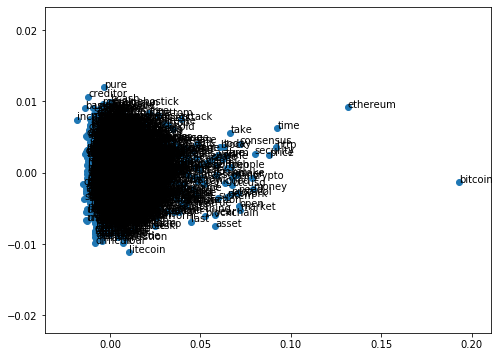

In [102]:
plot_2d_graph(vocabs,xs,ys)

In [103]:
nltk.help.upenn_tagset

<function nltk.help.upenn_tagset(tagpattern=None)>